# Word Representations

This notebook introduces word representations in Natural Language Processing (NLP). It explores advanced methods like TF-IDF, Word2Vec, and GloVe, along with cosine similarity for measuring word relationships and visualization techniques for embeddings.

# Bag of Word

In [ ]:
# Libraries

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd # For Visualizing the Vectors

Sample Corpus

In [ ]:
corpus = [
    "Cats chase mice in the garden garden.",
    "Dogs bark loudly at night.",
    "Birds sing sweet songs every morning.",
    "The cat sle[eps on the warm sofa.",
    "A fast dog chased the red ball.",
    "Mice hide quickly when cats appear.",
]

Create Bag of Words model using Sklearn CountVectorizer()

In [ ]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(corpus)

In [ ]:
X_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 35 stored elements and shape (6, 31)>

In [ ]:
vocabulary = bow_vectorizer.get_feature_names_out()
print("Vocabulary:\n",vocabulary)

Vocabulary:
 ['appear' 'at' 'ball' 'bark' 'birds' 'cat' 'cats' 'chase' 'chased' 'dog'
 'dogs' 'every' 'fast' 'garden' 'hide' 'in' 'loudly' 'mice' 'morning'
 'night' 'on' 'quickly' 'red' 'sing' 'sleeps' 'sofa' 'songs' 'sweet' 'the'
 'warm' 'when']


In [ ]:
print("\nBoW Matrix (as array):\n", X_bow.toarray())


BoW Matrix (as array):
 [[0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 2 1 0]
 [0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1]]


In [ ]:
count_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out(), index=corpus)
count_df

,appear,at,ball,bark,birds,cat,cats,chase,chased,dog,...,quickly,red,sing,sleeps,sofa,songs,sweet,the,warm,when
Cats chase mice in the garden garden.,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Dogs bark loudly at night.,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Birds sing sweet songs every morning.,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
The cat sleeps on the warm sofa.,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,2,1,0
A fast dog chased the red ball.,0,0,1,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
Mice hide quickly when cats appear.,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## TF-IDF

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a statistical measure that evaluates the importance of a word in a document relative to a collection (corpus). It has two main components:

*   TF (Term Frequency): Measures how often a word appears in a document.
*   IDF (Inverse Document Frequency): Reduces the impact of common words across many documents.

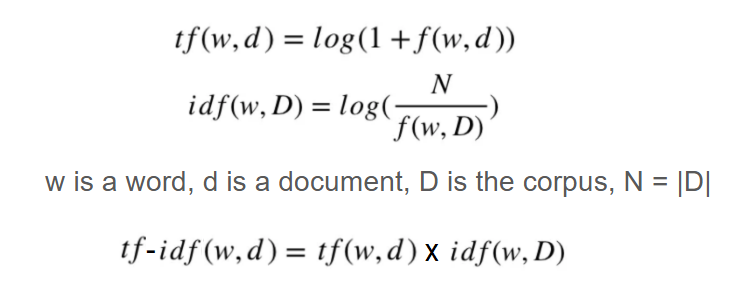

In [ ]:
# Libraries

from sklearn.feature_extraction.text import TfidfVectorizer

Create Tiidf model using Sklearn

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
vocabulary = tfidf_vectorizer.get_feature_names_out()
print("Vocabulary:\n",vocabulary)

Vocabulary:
 ['appear' 'at' 'ball' 'bark' 'birds' 'cat' 'cats' 'chase' 'chased' 'dog'
 'dogs' 'every' 'fast' 'garden' 'hide' 'in' 'loudly' 'mice' 'morning'
 'night' 'on' 'quickly' 'red' 'sing' 'sleeps' 'sofa' 'songs' 'sweet' 'the'
 'warm' 'when']


In [ ]:
print("\nTf-IDF Matrix (as array):\n", X_bow.toarray())


Tf-IDF Matrix (as array):
 [[0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 2 1 0]
 [0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1]]


In [ ]:
# TfidfVectorizer to compute the TF-IDF scores

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
print(X_tfidf.toarray())


[[0.         0.         0.         0.         0.         0.
  0.29315886 0.35750457 0.         0.         0.         0.
  0.         0.71500914 0.         0.35750457 0.         0.29315886
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.24750486 0.
  0.        ]
 [0.         0.4472136  0.         0.4472136  0.         0.
  0.         0.         0.         0.         0.4472136  0.
  0.         0.         0.         0.         0.4472136  0.
  0.         0.4472136  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.40824829 0.
  0.         0.         0.         0.         0.         0.40824829
  0.         0.         0.         0.         0.         0.
  0.40824829 0.         0.         0.         0.         0.40824829
  0.         0.         0.40824829 0.40824829 0.         0.
  0.        ]
 [0.         0.         0.        

In [ ]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=corpus)
tfidf_df

,appear,at,ball,bark,birds,cat,cats,chase,chased,dog,...,quickly,red,sing,sleeps,sofa,songs,sweet,the,warm,when
Cats chase mice in the garden garden.,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.293159,0.357505,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.247505,0.00000,0.000000
Dogs bark loudly at night.,0.000000,0.447214,0.000000,0.447214,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
Birds sing sweet songs every morning.,0.000000,0.000000,0.000000,0.000000,0.408248,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.408248,0.00000,0.00000,0.408248,0.408248,0.000000,0.00000,0.000000
The cat sleeps on the warm sofa.,0.000000,0.000000,0.000000,0.000000,0.000000,0.38022,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.38022,0.38022,0.000000,0.000000,0.526462,0.38022,0.000000
A fast dog chased the red ball.,0.000000,0.000000,0.427206,0.000000,0.000000,0.00000,0.000000,0.000000,0.427206,0.427206,...,0.000000,0.427206,0.000000,0.00000,0.00000,0.000000,0.000000,0.295760,0.00000,0.000000
Mice hide quickly when cats appear.,0.432546,0.000000,0.000000,0.000000,0.000000,0.00000,0.354694,0.000000,0.000000,0.000000,...,0.432546,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.432546


## Word2Vec


Word2Vec is a popular technique in NLP for converting words into numerical vectors (also known as embeddings), where words with similar meanings are represented by similar vectors.

Word2Vec is trained to adjust the vectors of words so that words appearing in similar contexts have similar vector representations. It can be trained using two main architectures:

*   Skip-Gram — Predicts context words from a target word.
*   Continuous Bag of Words (CBOW) — Predicts the target word from context words.

Word2Vec is a neural network-based model that learns word embeddings by predicting context words from a target word (Skip-Gram) or a target word from context words (CBOW). It uses a feed-forward neural network with an input layer (one-hot encoded word), a hidden layer (word embeddings), and an output layer (context words). During training, the model adjusts weights using backpropagation and gradient descent to minimize prediction error. The resulting embeddings capture semantic relationships, where words in similar contexts have similar representations.



In [ ]:
# Libraries

!pip install gensim
c

In [ ]:
# Corpus
corpus = [
    "Cats chase mice in the garden.",
    "Dogs bark loudly at night.",
    "Birds sing sweet songs every morning.",
    "The cat sleeps on the warm sofa.",
    "A fast dog chased the red ball.",
    "Mice hide quickly when cats appear.",
]

In [ ]:
sentences = [sentence.lower().split() for sentence in corpus]
sentences

[['cats', 'chase', 'mice', 'in', 'the', 'garden.'],
 ['dogs', 'bark', 'loudly', 'at', 'night.'],
 ['birds', 'sing', 'sweet', 'songs', 'every', 'morning.'],
 ['the', 'cat', 'sleeps', 'on', 'the', 'warm', 'sofa.'],
 ['a', 'fast', 'dog', 'chased', 'the', 'red', 'ball.'],
 ['mice', 'hide', 'quickly', 'when', 'cats', 'appear.']]

In [ ]:
model = Word2Vec(vector_size=10, window=3, sg=1, min_count=1)


*   vector_size = Dimension of each word vector (how many features each word is represented by)
*   window = Context window size — number of words to the left and right considered as context.
*   sg=1 = Training algorithm; 1 = Skip-Gram | 0 = CBOW
*   min_count = Ignores words that appear fewer times than this threshold in the corpus.

In [ ]:
# Build vocabulary
voc = model.build_vocab(sentences)

In [ ]:
# Train the model
model.train(sentences, total_examples=len(sentences), epochs=10)


(75, 370)

In [ ]:
# Get word vector for 'cats'

cats_vector = model.wv['cats']
print("Word Vector for 'cats':", cats_vector)
print("---------------------------------------------------------------------------------------------------")

# Get word vector for 'dogs'

dogs_vector = model.wv['dogs']
print("Word Vector for 'dogs':", dogs_vector)
print("---------------------------------------------------------------------------------------------------")

# Get word vector for 'mice'

mice_vector = model.wv['mice']
print("Word Vector for 'mice':", mice_vector)

Word Vector for 'cats': [ 0.07307888  0.05075055  0.06751923  0.00755519  0.06354158 -0.03401349
 -0.00944893  0.05774654 -0.07523876 -0.03930302]
---------------------------------------------------------------------------------------------------
Word Vector for 'dogs': [ 0.01217502 -0.08458303 -0.0822377  -0.00230556  0.01236892 -0.05743888
 -0.04724409 -0.07344445  0.08327902  0.00121991]
---------------------------------------------------------------------------------------------------
Word Vector for 'mice': [ 0.07379718 -0.01532843 -0.04537288  0.0655283  -0.04859158 -0.01815514
  0.02875209  0.00993615 -0.08286157 -0.09448049]


**Cosine similarity** measures how similar two vectors are by calculating the cosine of the angle between them. It is commonly used in text similarity, word embeddings, and recommendation systems.

*   1 → Vectors are identical (same direction)
*   0 → Vectors are orthogonal (unrelated)
*   -1 → Vectors are opposite (completely different)

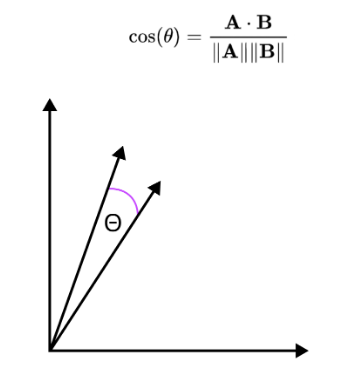


In [ ]:
# Libraries

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Cosine similarity between 'cats' and 'dogs'

cat_dog = cosine_similarity([cats_vector], [dogs_vector])
print(cat_dog )
print(f"Cosine Similarity between 'cats' and 'dogs': {cat_dog[0][0]}")
print("-----------------------------------------------------------------")

# Cosine similarity between 'cats' and 'mice'

cat_mice = cosine_similarity([cats_vector], [mice_vector])
print(cat_mice)
print(f"Cosine Similarity between 'cats' and 'mice': {cat_mice[0][0]}")

[[-0.5417753]]
Cosine Similarity between 'cats' and 'dogs': -0.5417752861976624
-----------------------------------------------------------------
[[0.32909018]]
Cosine Similarity between 'cats' and 'mice': 0.3290901780128479


##GloVe

GloVe (Global Vectors for Word Representation) is a word embedding model that learns vector representations of words based on their global co-occurrence statistics in a large corpus.  Unlike some models that only look at words nearby, GloVe looks at how often words appear together in the entire collection of text (the whole corpus).

The pretrained GloVe model is available in various sizes (e.g., 50D, 100D, 200D, 300D) and is trained on large corpora like Wikipedia, Common Crawl, etc. The model is stored in text files, with each line containing a word and its corresponding vector. These pretrained embeddings are ready to use directly for various NLP tasks like similarity calculation, text classification, or sentiment analysis.

In [ ]:
# Libraries

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

Mounted at /content/drive


In [ ]:
# Save GloVe File in Drive

glove_file = '/content/drive/MyDrive/glove.6B.50d.txt'

In [ ]:
# Load the GloVe vectors from file

def load_glove_model(glove_file):
    word_vectors = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            word_vectors[word] = vector
    return word_vectors

# Load the pretrained GloVe embeddings

glove_model = load_glove_model(glove_file)


In [ ]:
# Get word vector for 'cat'

cat_vector = glove_model['cat']
print("Word Vector for 'cat':", cat_vector)
print("-----------------------------------------------------------------------------------------------")

# Get word vector for 'dog'

dog_vector = glove_model['dog']
print("Word Vector for 'dog':", dog_vector)
print("-----------------------------------------------------------------------------------------------")

# Get word vector for 'mice'

mice_vector = glove_model['mice']
print("Word Vector for 'mice':", mice_vector)

Word Vector for 'cat': [ 0.45281  -0.50108  -0.53714  -0.015697  0.22191   0.54602  -0.67301
 -0.6891    0.63493  -0.19726   0.33685   0.7735    0.90094   0.38488
  0.38367   0.2657   -0.08057   0.61089  -1.2894   -0.22313  -0.61578
  0.21697   0.35614   0.44499   0.60885  -1.1633   -1.1579    0.36118
  0.10466  -0.78325   1.4352    0.18629  -0.26112   0.83275  -0.23123
  0.32481   0.14485  -0.44552   0.33497  -0.95946  -0.097479  0.48138
 -0.43352   0.69455   0.91043  -0.28173   0.41637  -1.2609    0.71278
  0.23782 ]
-----------------------------------------------------------------------------------------------
Word Vector for 'dog': [ 0.11008   -0.38781   -0.57615   -0.27714    0.70521    0.53994
 -1.0786    -0.40146    1.1504    -0.5678     0.0038977  0.52878
  0.64561    0.47262    0.48549   -0.18407    0.1801     0.91397
 -1.1979    -0.5778    -0.37985    0.33606    0.772      0.75555
  0.45506   -1.7671    -1.0503     0.42566    0.41893   -0.68327
  1.5673     0.27685   -0.61708

In [ ]:
# Cosine similarity between 'cat' and 'dog'

cat_dog = cosine_similarity([cat_vector], [dog_vector])
print(cat_dog)
print(f"Cosine Similarity between 'cat' and 'dog': {cat_dog[0][0]}")
print("-----------------------------------------------------------------")

# Cosine similarity between 'cat' and 'mice'

cat_mice = cosine_similarity([cat_vector], [mice_vector])
print(cat_mice)
print(f"Cosine Similarity between 'cats' and 'mice': {cat_mice[0][0]}")
print("-----------------------------------------------------------------")

# Cosine similarity between 'dog' and 'mice'

dog_mice = cosine_similarity([dog_vector], [mice_vector])
print(dog_mice)
print(f"Cosine Similarity between 'dog' and 'mice': {dog_mice[0][0]}")

[[0.92180055]]
Cosine Similarity between 'cat' and 'dog': 0.9218005537986755
-----------------------------------------------------------------
[[0.5828184]]
Cosine Similarity between 'cats' and 'mice': 0.5828183889389038
[[0.5128297]]
Cosine Similarity between 'dog' and 'mice': 0.5128297209739685
